# Exploratory data analysis of the loans dataset


This workbook explores the loans dataset containing loans performance data 


In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Summary of findings and transformations from the EDA below:

### Descriptive Statistics

### Data preparation
##### Target variable
- Create independent variable: loan default from combining categories default and late_payment from loan_status
     - 0.5% of loans defaulted (full default)
     - 4.4% of loans either are late by more than 90 days or defaulted
     
##### Addressing NAs   
- Noting that the variables las_record_month, last_derog_month and last_delinquency_month have:
    - more than 60% missing values
    - do not present a huge density at 0 (as most people behave lawfully
    - I resolve the missing values issue buy replacing NAs with zeros
- I fill the remaining missing entries by taking the median value for each of the variables;
    - total_current_balance
    - total_employment_length
    - district

##### Outliers
The following 3 variables present significant outliers:
- annual_income
- total_current_balance
- credit_card_balance

##### Variable normalisation

##### One-hot encoding of categorical variables

##### Class imbalances

##### 


      
      

### First let's understand the dataset's variables

In [288]:
# Load data-dictionary.csv
pd.set_option('max_colwidth', 500)
metadata = pd.read_csv('data-dictionary.csv')
metadata



variable                                                                                                                                                                                            description
0             annual_income                                                                                                                               The self-reported annual income provided by the borrower at application.
1            delinquency_2y                                                                                          The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
2               description                                                                                                                                  A free-text description of the loan purpose provided by the borrower.
3            debt_to_income  A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower's self-reported monthly income.
4      earliest_credit_line                                                                                                                                     The month the borrower's earliest reported credit line was opened.
5         employment_length                                                                     Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years.
6                 job_title                                                                                                                                     The job title supplied by the borrower when applying for the loan.
7            home_ownership                                                                                                                                                    The home ownership status provided by the borrower.
8              inquiries_6m                                                              The number of inquiries from lenders for a copy of the borrower's credit report in past 6 months (excluding auto and mortgage inquiries).
9               installment                                                                                                                                                                       The monthly payment on the loan.
10            interest_rate                                                                                                                                                                             Interest rate on the loan.
11               issue_date                                                                                                                                                                   The month which the loan was funded.
12              loan_amount                                                                                                                                                                                  The size of the loan.
13              loan_status                                                                                                                                                                            Current status of the loan.
14  last_delinquency_months                                                                                                                                            The number of months since the borrower's last delinquency.
15        last_derog_months                                                                                                                        Months since most recent 90-days late or worse rating on a loan or credit line.
16       last_record_months                                                                                                                   The number of mont

#### Observations on the variables

The dataset contains 31 variables:

- Most are numerical
- A few contain strings / text (i.e. decription, job title, postcode...)

### Let's then explore the data itself


In [325]:
# load loans dataset 'data set.csv'
loans = pd.read_csv('data set.csv')
pd.set_option('max_colwidth', 50)
loans.head()


/Users/pablo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


account_id  installment  loan_amount  interest_rate        term             purpose issue_date                                        description                                 title home_ownership  ... credit_card_usage credit_card_balance total_current_balance nr_accounts  loan_status  amount_payed  year          district  postcode_district  credit_score
0      125968       829.10        25000          11.89   36 months  debt_consolidation     Aug-09  Due to a lack of personal finance education an...  Debt consolidation for on-time payer           RENT  ...              52.1               28854                   NaN          42   Fully Paid  29324.320000  2009         Liverpool                L69    710.699725
1      128479        40.50         1200          13.11   36 months  debt_consolidation     Mar-10  If funded, I would use this loan consolidate t...                                 zxcvb            OWN  ...              40.4                2584                   NaN          31   Fully Paid   1457.310000  2010         Redbridge                IG9    416.086929
2      128650       366.86        10800          13.57   36 months  debt_consolidation     Nov-09  I currently have a personal loan with Citifina...                         Nicolechr1978           RENT  ...              25.6                3511                   NaN          40   Fully Paid  13195.270000  2009             Rugby               CV21    354.228832
3      129758       264.11         7200          19.05   36 months  debt_consolidation     Aug-12  Credit cards are out of here, I am tired of be...                             caminijio           RENT  ...              90.1                3874              154930.0          25   Fully Paid   9100.804663  2012      West Lindsey               DN21    697.214163
4      130240       102.92         3000          14.26   36 months         credit_card     Sep-09  I am seeking to refinance a credit account whi...    Rejecting new cardmember agreement       MORTGAGE  ...              39.5                4740                   NaN          23   Fully Paid   3703.380000  2009  South Derbyshire               DE11    799.428700

[5 rows x 32 columns]

In [52]:
# shape of dataset
print(f'The data has shape {loans.shape}')
# column headers and types
print(f'Column headers and data types: \n\n{loans.dtypes}')


The data has shape (237436, 32)
Column headers and data types: 

account_id                   int64
installment                float64
loan_amount                  int64
interest_rate              float64
term                        object
purpose                     object
issue_date                  object
description                 object
title                       object
home_ownership              object
annual_income               object
employment_length           object
job_title                   object
earliest_credit_line        object
public_records               int64
last_record_months         float64
last_delinquency_months    float64
last_derog_months          float64
delinquency_2y               int64
inquiries_6m                 int64
open_accounts                int64
debt_to_income             float64
credit_card_usage          float64
credit_card_balance          int64
total_current_balance      float64
nr_accounts                  int64
loan_status              

The dataset contains 32 columns, including 'account_id', not described in the dictionary

In [36]:
# describe data
loans.describe()

account_id    installment    loan_amount  interest_rate  public_records  last_record_months  last_delinquency_months  last_derog_months  delinquency_2y   inquiries_6m  open_accounts  debt_to_income  credit_card_usage  credit_card_balance  total_current_balance    nr_accounts   amount_payed           year   credit_score
count  2.374360e+05  237436.000000  237436.000000  237436.000000   237436.000000        29856.000000            106113.000000       46380.000000   237436.000000  237436.000000  237436.000000   237436.000000      237263.000000         2.374360e+05           1.818460e+05  237436.000000  237436.000000  237436.000000  237436.000000
mean   1.405475e+07     419.159352   13605.866949      13.573961        0.148474           76.418542                35.210304          43.535985        0.256115       0.827650      10.994643       16.527753          53.934336         1.528566e+04           1.405537e+05      25.196857   14038.711689    2013.001251     550.464540
std    1.633466e+07     245.262282    8143.438261       4.367939        0.447853           27.751003                21.735406          21.628939        0.755754       1.053242       4.927293        7.811664          24.766781         1.904480e+04           1.545430e+05      11.784116    9547.781634       1.409373     200.150799
min    1.259680e+05      19.870000    1000.000000       5.320000        0.000000            0.000000                 0.000000           0.000000        0.000000       0.000000       0.000000        0.000000           0.000000         0.000000e+00           0.000000e+00       2.000000       0.000000    2009.000000    -345.011615
25%    1.590146e+06     240.920000    7375.000000      10.490000        0.000000           55.000000                17.000000          27.000000        0.000000       0.000000       8.000000       10.720000          35.800000         5.866000e+03           2.881625e+04      17.000000    6753.265000    2012.000000     415.633519
50%    7.000832e+06     365.595000   12000.000000      13.330000        0.000000           78.000000                32.000000          43.000000        0.000000       1.000000      10.000000       16.140000          55.300000         1.093900e+04           8.310400e+04      24.000000   11917.474020    2013.000000     550.471579
75%    2.036944e+07     547.950000   18375.000000      16.290000        0.000000          101.000000                51.000000          60.000000        0.000000       1.000000      14.000000       21.960000          73.400000         1.914600e+04           2.113568e+05      32.000000   19227.201530    2014.000000     685.368923
max    6.867589e+07    1409.990000   35000.000000      28.990000       15.000000          121.000000               152.000000         159.000000       29.000000       8.000000      76.000000       57.140000         892.300000         1.743266e+06           8.000078e+06     150.000000   57777.579870    2015.000000    1409.030401

Some variables contain substantial amount of missing entries (last_record_months only 29,856 entries of more than 230,000)

### Inspect the data to understand cleaning and transformation requirements

In [245]:
def plot_hist(feature, df):
    """
    Takes as input a dataframe df, one of its columns. Checks if columns has categorical
    or numerical data and plot the distribution accordingly.
    
    Parameters
    ----------
    featrue : str
        column name to plot.
    df : pd.DataFrame 
        Full dataframe where feature to be plotted is stored.
        
    Returns
    -------
    A graph plot of the desired feature of df. 
    """
    if df[feature].dtype in ['float64', 'int64']:
        print(f'Distribution of variable: {feature}')
        chart = sns.distplot(df[feature])
    else:
        print(f'Category frequency of variable: {feature}')
        chart = sns.countplot(x = feature, data = df)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        chart
    return chart

In [326]:
# annual_income variable has at least one invalid entry as failed to plot initially. Solving this:
loans['annual_income'] = loans['annual_income'].str.replace('GBP ', '').astype(float)

Distribution of variable: account_id


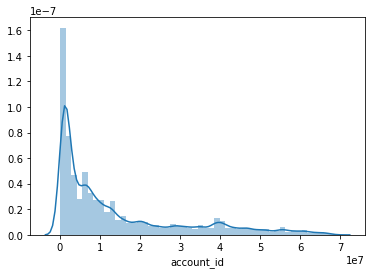

Distribution of variable: installment


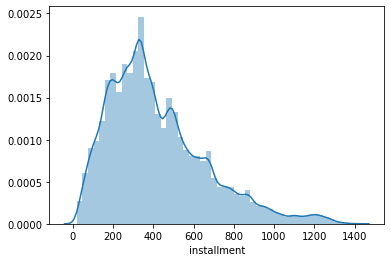

Distribution of variable: loan_amount


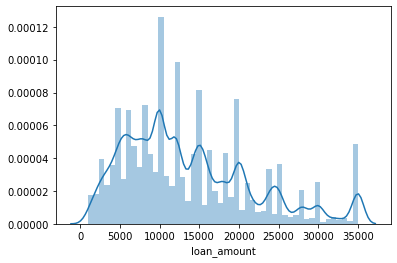

Distribution of variable: interest_rate


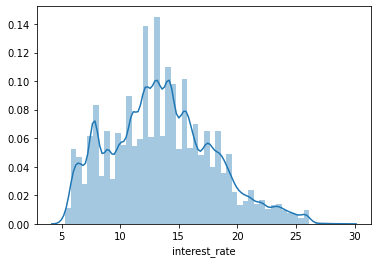

Category frequency of variable: term


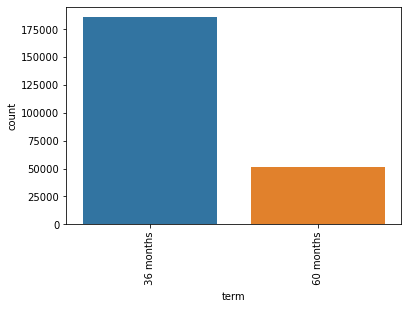

Category frequency of variable: purpose


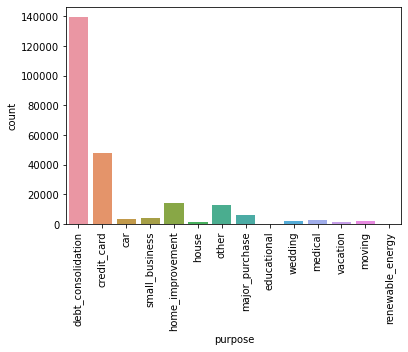

Category frequency of variable: issue_date


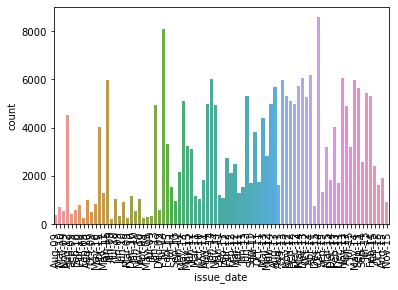

Category frequency of variable: home_ownership


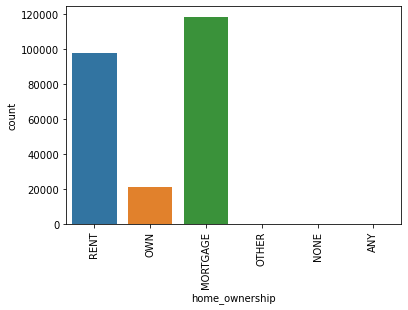

Distribution of variable: annual_income


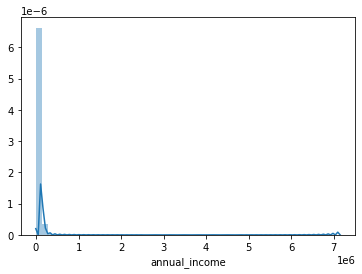

Category frequency of variable: employment_length


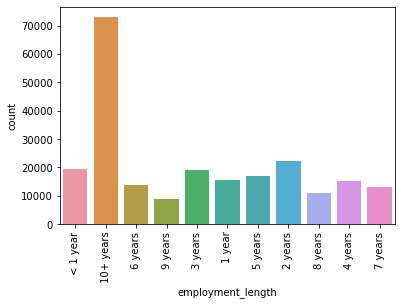

Category frequency of variable: earliest_credit_line


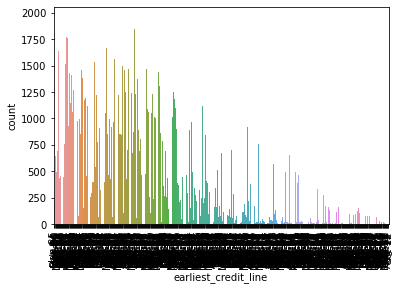

Distribution of variable: public_records


/Users/pablo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


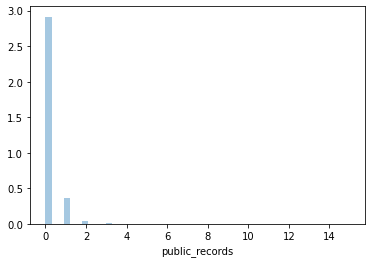

Distribution of variable: last_record_months


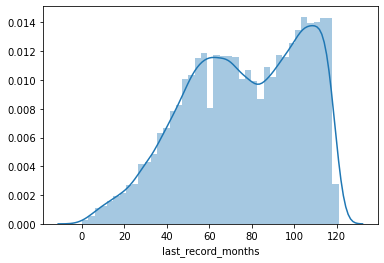

Distribution of variable: last_delinquency_months


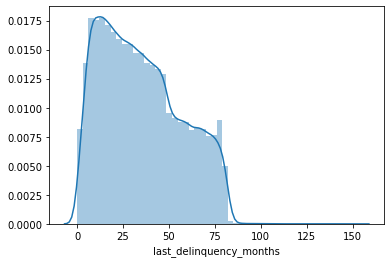

Distribution of variable: last_derog_months


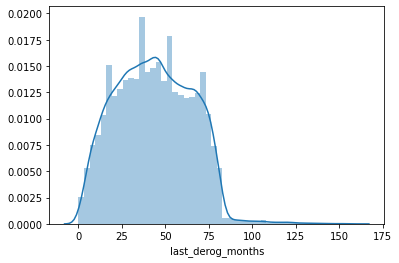

Distribution of variable: delinquency_2y


/Users/pablo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


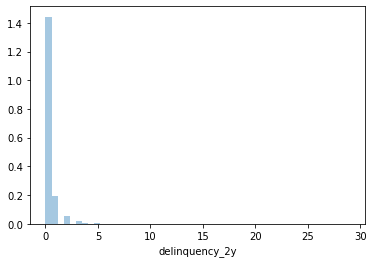

Distribution of variable: inquiries_6m


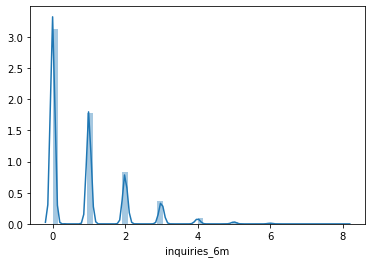

Distribution of variable: open_accounts


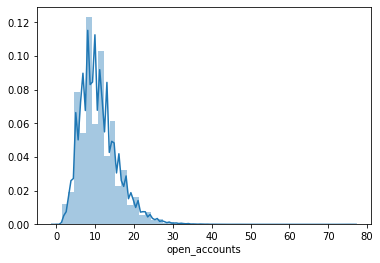

Distribution of variable: debt_to_income


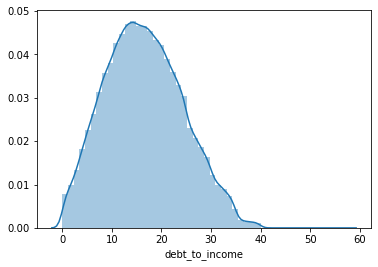

Distribution of variable: credit_card_usage


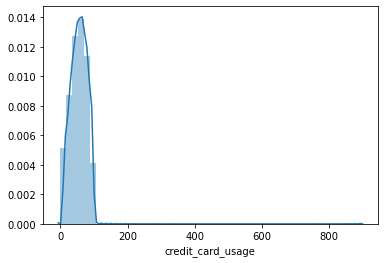

Distribution of variable: credit_card_balance


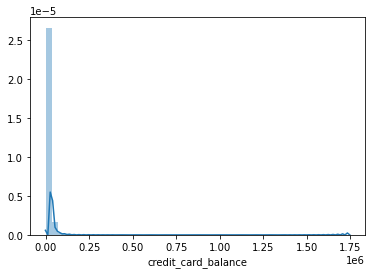

Distribution of variable: total_current_balance


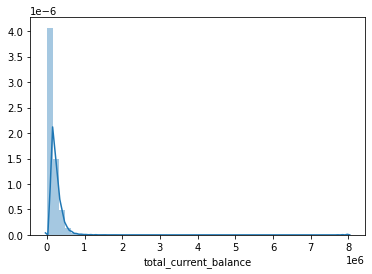

Distribution of variable: nr_accounts


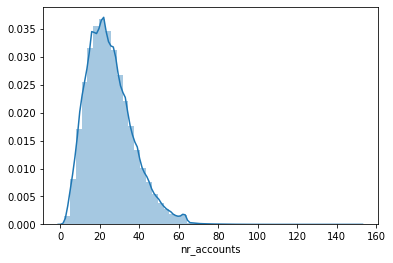

Category frequency of variable: loan_status


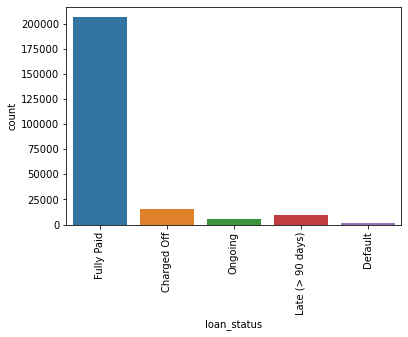

Distribution of variable: amount_payed


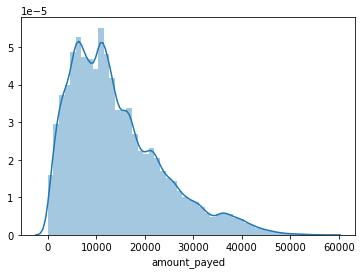

Distribution of variable: year


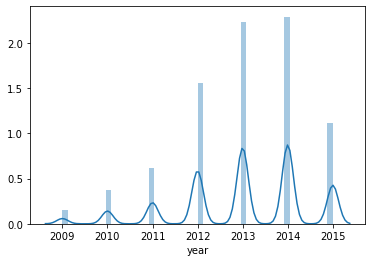

Category frequency of variable: district


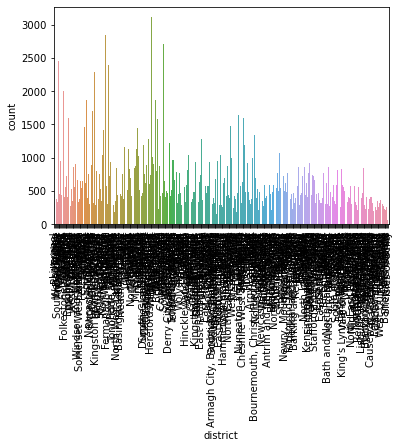

Category frequency of variable: postcode_district


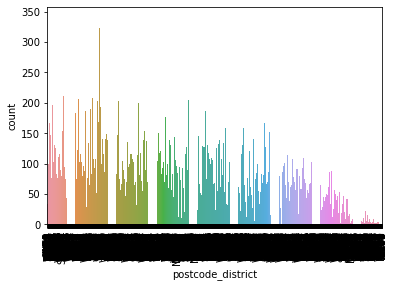

Distribution of variable: credit_score


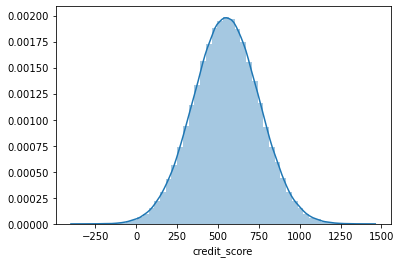

In [269]:
# Plot all data columns for inspections
for i,feat in enumerate(loans.columns):
    if feat not in ['description', 'title', 'job_title']:
        plt.figure(i)
        plot_hist(feat, loans)
        plt.show()



### Target variable
From the loan_status variable, let's create a binary variable for loan default

In [327]:
loans = pd.get_dummies(loans, columns=['loan_status'])

In [328]:
loans['loan_status_Default'].describe()

count    237436.000000
mean          0.005134
std           0.071468
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: loan_status_Default, dtype: float64

In [329]:
# let's create an addidtional variable 'default', combining loans with late payments and full default
loans['default'] = loans['loan_status_Late (> 90 days)'] + loans['loan_status_Default']
loans['default'].describe()

count    237436.000000
mean          0.044294
std           0.205748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: default, dtype: float64

In [330]:
loans[['default','purpose']].groupby('purpose').mean().sort_values('default', ascending = False)

default
purpose                     
debt_consolidation  0.048169
moving              0.046347
small_business      0.045236
home_improvement    0.042216
other               0.041896
vacation            0.040404
credit_card         0.039565
medical             0.039216
house               0.035667
major_purchase      0.033615
car                 0.021370
renewable_energy    0.013100
wedding             0.004018
educational         0.000000

In [331]:
loans[['loan_status_Default','purpose']].groupby('purpose').mean().sort_values('loan_status_Default', ascending = False)

loan_status_Default
purpose                                
moving                         0.005998
medical                        0.005767
debt_consolidation             0.005663
vacation                       0.005387
other                          0.005034
credit_card                    0.004872
small_business                 0.004802
house                          0.004624
home_improvement               0.003296
car                            0.002927
major_purchase                 0.002365
educational                    0.000000
renewable_energy               0.000000
wedding                        0.000000

### Missing values

In [332]:
### Calculate missing values in each columns
def missing_values_table(df):
    """
    Takes as input a dataframe, checks which columns contain 
    missing values, returns their count and percentage.
    
    Parameters
    ----------
    df : pd.DataFrame 
        Full dataframe to check missing values.

    Returns
    -------
    A DataFrame with two columns containing the missing values
    and percentage of values missing for each affected variable.
    """
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)  
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
           

In [388]:
missing_values_table(loans)

The selected dataframe has 38 columns.
There are 4 columns that have missing values.


Missing Values  % of Total Values
description          159498               67.2
job_title             12601                5.3
district                888                0.4
title                    12                0.0

#### Replace with MAX value:
last_record_months, last_derog_months, last_delinquency_months

Some interesting insights can be derived frmo contrasting the charts above for these three variables and the variable delinquency_2y:

- most of the sample never has had any incidence or delinquncey in the past 2 years (delinquency_2y)
- likewise we shall expect most of the sample to have 'infinite' value for last_delinquency_month, last_derog_months and last_dedlinquency_months
- I assume then that the maximum value observed in the sample for each of these variables is the one to fill in NAs with, for which more than 50% of the data is missing

In [353]:
# replace nan with the largest value in sample
for var in ['last_record_months', 'last_derog_months', 'last_delinquency_months']:
    loans[var] = loans[var].fillna(np.nanmax(loans[var]))

#### Replace with MEDIAN 
total_current_balance, employment_length, credit_card_usage

- employment_length needs first to be transformed to numeric
- replace then all missing values with the median

In [360]:
# convert employment_length to numeric
set(loans['employment_length'])


{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

In [378]:
# keep first part of string
loans['employment_length_num'] = loans['employment_length'].str.split(' ').str[0]
# replace 10+ witth 10 and < with 0
loans['employment_length_num'].replace('10+', 10, inplace=True)
loans['employment_length_num'].replace('<',0, inplace=True)
# to numeric
loans['employment_length_num'] = pd.to_numeric(loans['employment_length_num'])

In [387]:
# replace missing values with median
for var in ['total_current_balance', 'employment_length_num', 'credit_card_usage']:
    loans[var] = loans[var].fillna(loans['employment_length_num'].median())

### Outliers

In [318]:
# check on skewed variables:
skwd_vars = ['annual_income',
             'total_current_balance',
             'credit_card_balance']

for var in skwd_vars:
    print(f'Cheking on {var}:')
    print(f'Summary statistics: \n{loans[var].describe()}')
    print(f'90th quantile: {loans[var].quantile(0.9)}')
    print(f'99th quantile: {loans[var].quantile(0.99)}')
    print(f'99.99th quantile: {loans[var].quantile(0.9999)}\n')


Cheking on annual_income:
Summary statistics: 
count    2.374360e+05
mean     7.354776e+04
std      5.755593e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.900000e+04
max      7.141778e+06
Name: annual_income, dtype: float64
90th quantile: 120000.0
99th quantile: 240000.0
99.99th quantile: 1200000.0

Cheking on total_current_balance:
Summary statistics: 
count    1.818460e+05
mean     1.405537e+05
std      1.545430e+05
min      0.000000e+00
25%      2.881625e+04
50%      8.310400e+04
75%      2.113568e+05
max      8.000078e+06
Name: total_current_balance, dtype: float64
90th quantile: 334766.0
99th quantile: 655179.4499999981
99.99th quantile: 2002797.7974990925

Cheking on credit_card_balance:
Summary statistics: 
count    2.374360e+05
mean     1.528566e+04
std      1.904480e+04
min      0.000000e+00
25%      5.866000e+03
50%      1.093900e+04
75%      1.914600e+04
max      1.743266e+06
Name: credit_card_balance, dtype: float64
90th quantile: 30604.5


visualise the outliers by target variable

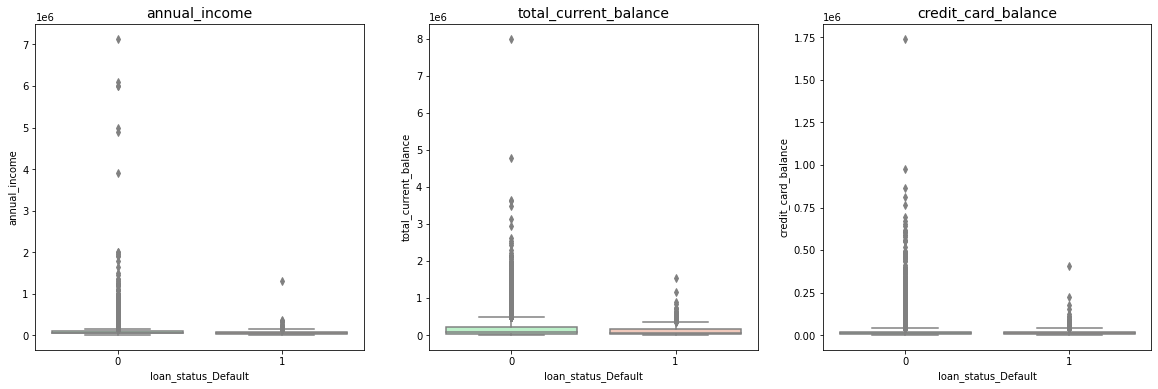

In [319]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers 
# Feature annual_income
sns.boxplot(x="loan_status_Default", y="annual_income", data=loans,ax=ax1, palette=colors)
ax1.set_title("annual_income", fontsize=14)

# Feature total_current_balance
sns.boxplot(x="loan_status_Default", y="total_current_balance", data=loans, ax=ax2, palette=colors)
ax2.set_title("total_current_balance", fontsize=14)

# Feature credit_card_balance
sns.boxplot(x="loan_status_Default", y="credit_card_balance", data=loans, ax=ax3, palette=colors)
ax3.set_title("credit_card_balance", fontsize=14)



plt.show()

In [355]:
loans.shape

(237436, 37)

In [321]:
# remove extreme values - 99.9th quantile
for feat in skwd_vars:
    loans = loans[loans[feat]<=loans[feat].quantile(0.999)]


In [322]:
loans.shape

(181309, 37)

### Data transformations


#### Create dummy variables for all remaining categorical data

In [262]:
cat=['term', 'purpose', 'home_ownership']

In [265]:
loans = pd.get_dummies(loans, columns=cat)

Index(['account_id', 'installment', 'loan_amount', 'interest_rate', 'issue_date', 'description', 'title', 'annual_income', 'employment_length', 'job_title', 'earliest_credit_line', 'public_records', 'last_record_months', 'last_delinquency_months', 'last_derog_months', 'delinquency_2y', 'inquiries_6m', 'open_accounts', 'debt_to_income', 'credit_card_usage', 'credit_card_balance', 'total_current_balance', 'nr_accounts', 'amount_payed', 'year', 'district', 'postcode_district', 'credit_score', 'loan_status_Charged Off', 'loan_status_Default', 'loan_status_Fully Paid', 'loan_status_Late (> 90 days)', 'loan_status_Ongoing', 'default', 'term_ 36 months', 'term_ 60 months', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'home_ownership_

Four variables have more than 50% of missing entries. Would probably have to leave these out

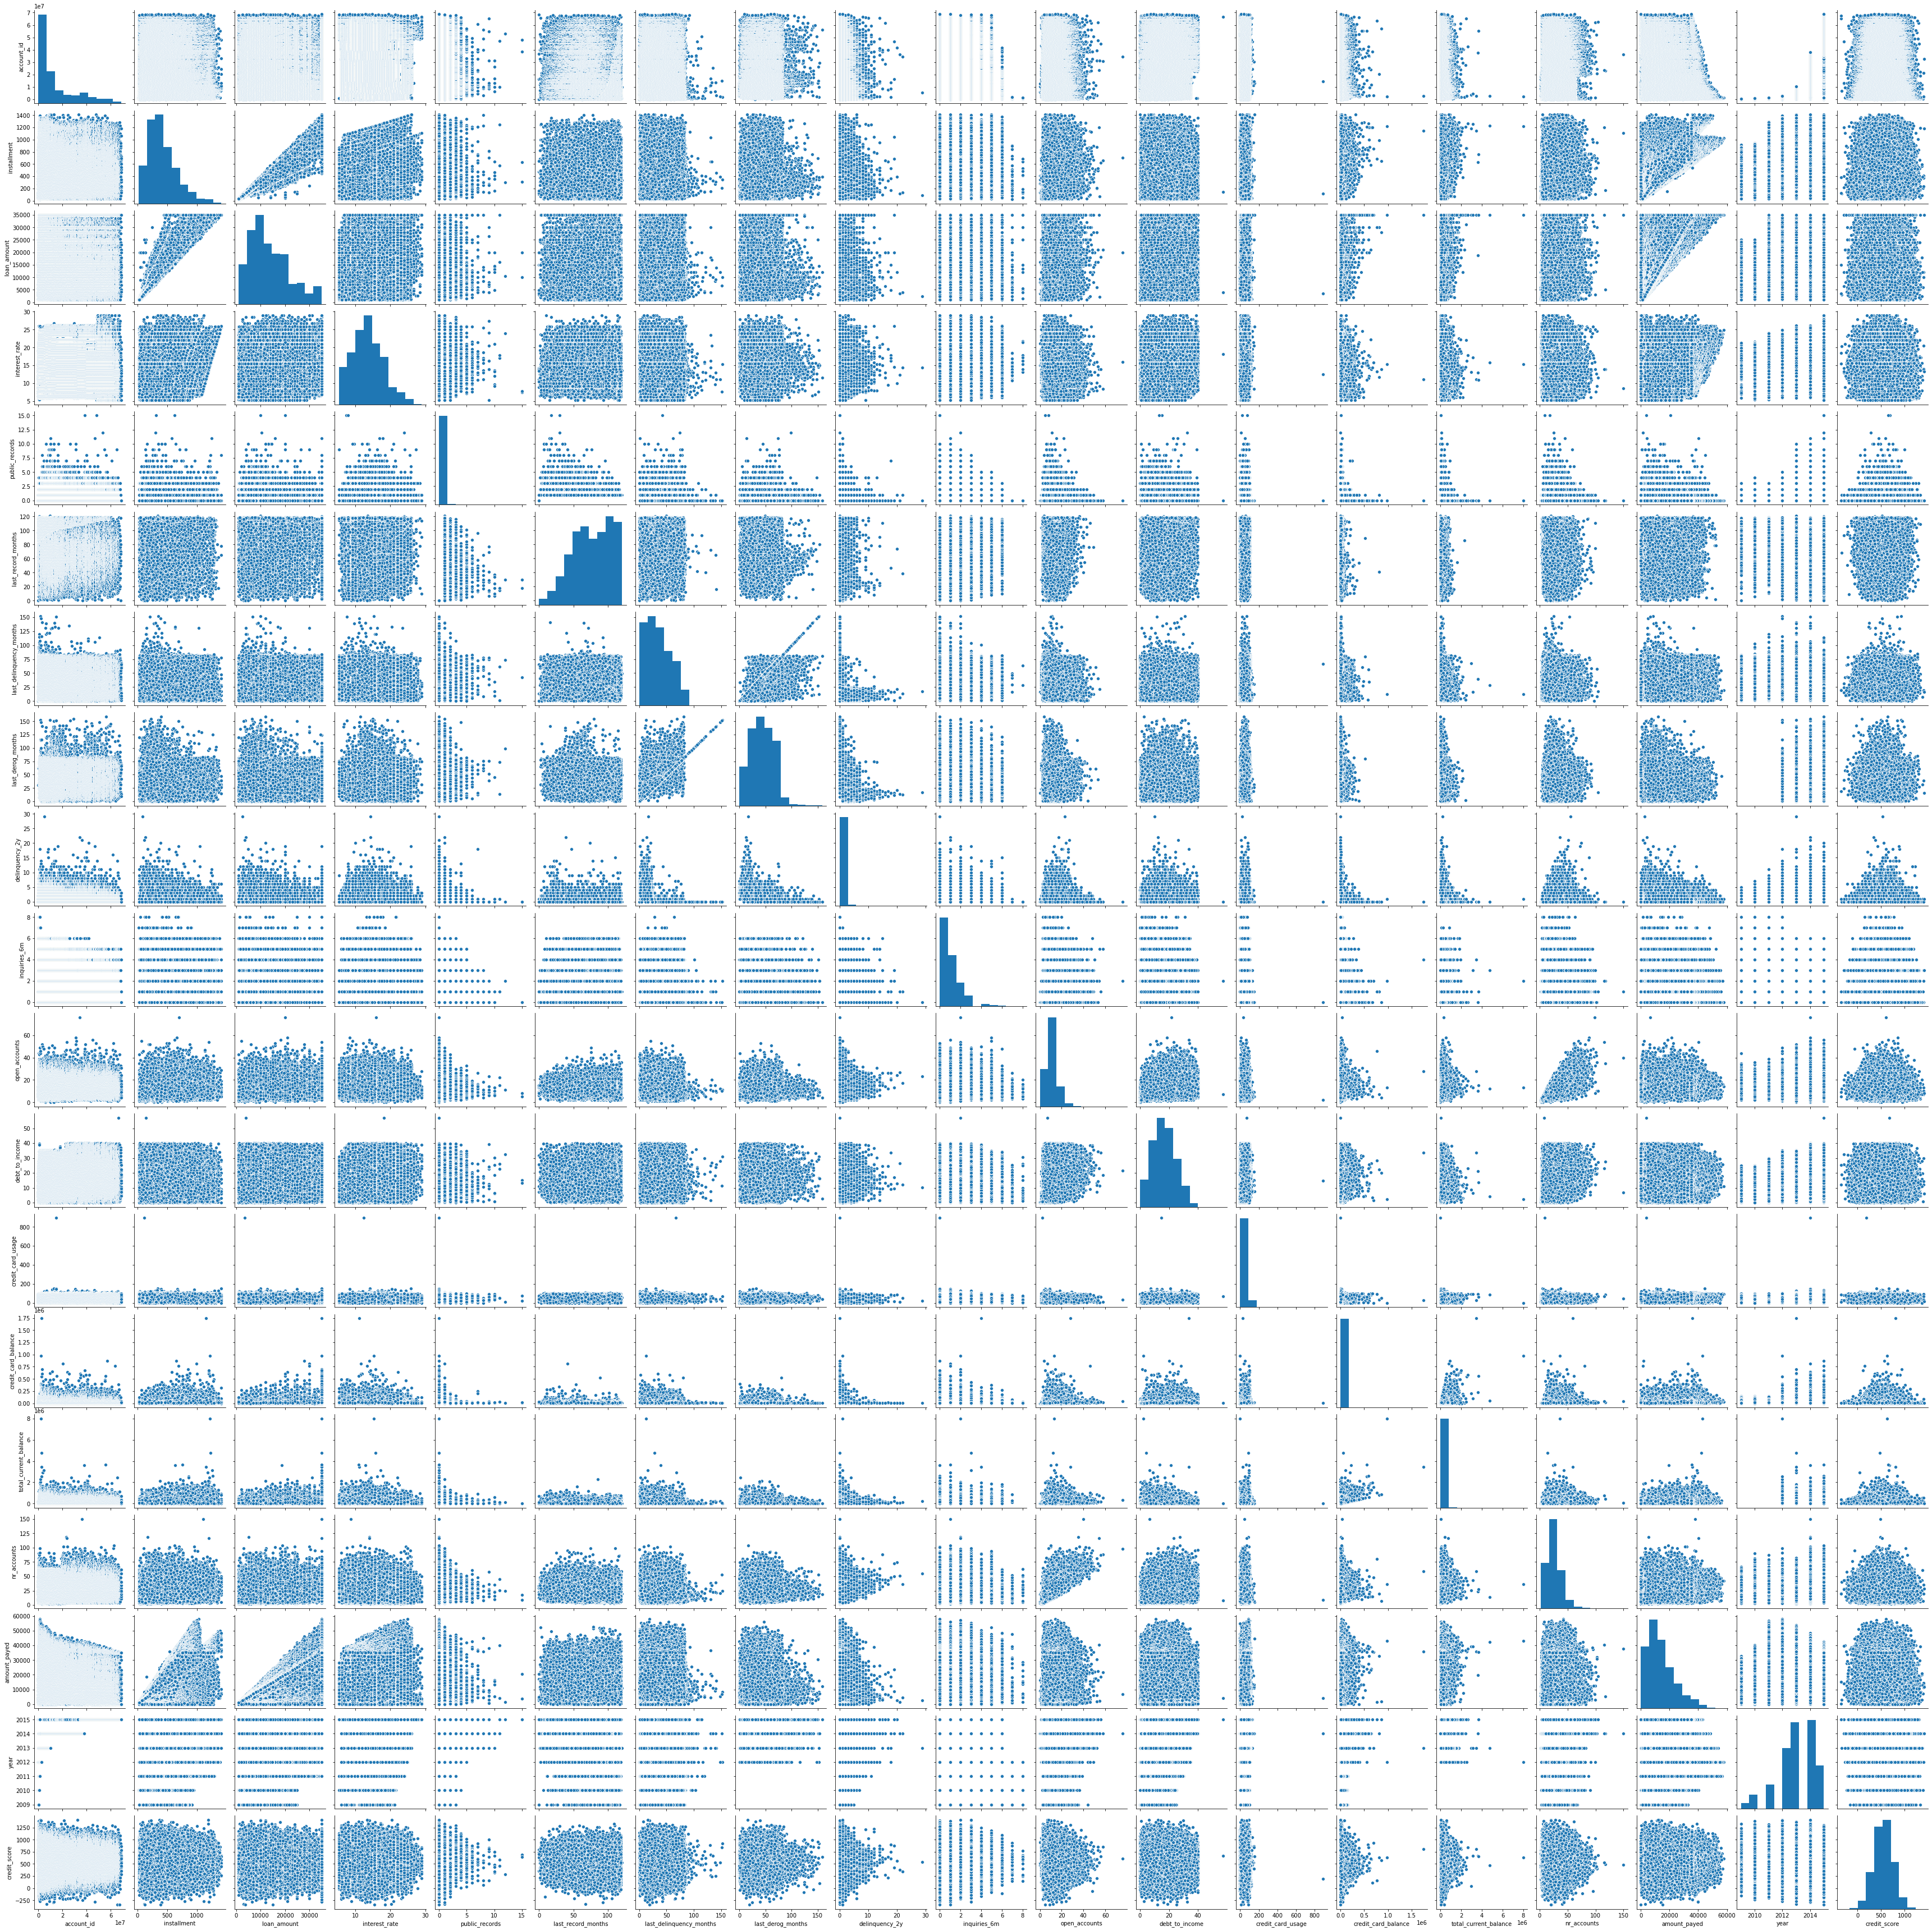

In [45]:
sns.pairplot(loans)

Check:
- credit_score
- loan_status to numeric
- term - remove 'month'
- purpose - encode as numeric
- home_ownership to numeric

Once all variables to numeric get their empirical distribution of each to assess imbalances, etc..

Fill in missing values:
    - over 80%: ignore
    - fill with average

Model:

predict the probability of default at the time of application